<a href="https://colab.research.google.com/github/isque03/deeplearning_colab/blob/main/keras_imbd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[55]])
decoded_review

1654784/1641221 [==============================] - 0s 0us/step


"? kubrick meets king it sounded so promising back in the spring of 1980 i remember then the movie came out and the kubrick ? have been ? with the king ? ever since br br the king ? say stanley kubrick took a great horror tale and ruined it the kubrick ? don't give a damn about king's story they talk about ? tracking shots camera angles this is a film they insist it should be considered on its own as it happens both camps are correct unfortunately br br if one views it purely as an adaptation of king's novel the shining is indeed a failure a wasted opportunity a series of ? narrative ? br br i used to blame that on kubrick's screenwriter the writer diane johnson author of le marriage ? le divorce etc has a reputation as an novelist of social manners maybe she was chosen for her subtle grasp of ? relations or family dynamics but the little blue collar town of ? ? doesn't exist on any map in her ? universe br br kubrick the ? probably found her ? however he of course is the real auteur a

Epoch 1/20
30/30 [==============================] - 4s 48ms/step - loss: 0.5192 - accuracy: 0.7883 - val_loss: 0.4030 - val_accuracy: 0.8530
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3153 - accuracy: 0.9023 - val_loss: 0.3161 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2332 - accuracy: 0.9259 - val_loss: 0.3055 - val_accuracy: 0.8790
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1840 - accuracy: 0.9403 - val_loss: 0.2786 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1513 - accuracy: 0.9519 - val_loss: 0.2894 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1255 - accuracy: 0.9603 - val_loss: 0.2869 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1037 - accuracy: 0.9683 - val_loss: 0.3018 - val_accuracy: 0.8855
Epoch 8/20
30

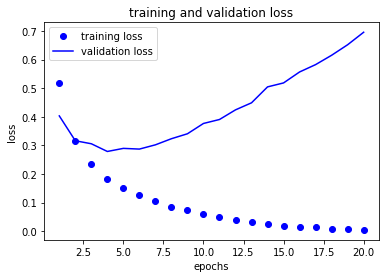

In [3]:
# encode integers via muli-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
# model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
                          layers.Dense(16,activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# set aside validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# training

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

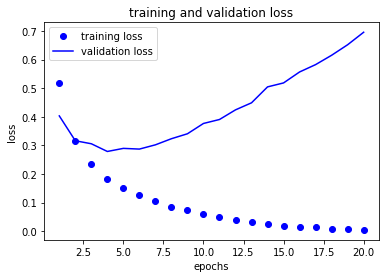

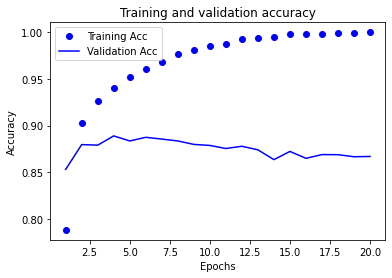

In [6]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values) + 1)
plt.plot(epochs,loss_values,"bo", label="training loss")
plt.plot(epochs,val_loss_values,"b", label="validation loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.clf();
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs,acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()